In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, tree,metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_validate,StratifiedKFold, cross_val_score
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns 
sns.set(style="ticks", color_codes=True) 

from pprint import pprint

In [2]:
df=pd.read_csv("final_.csv")
df.head()

,GENDER,AGEGRP1,NGROUP,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
0,3,3,2,3000.00,2,2,0,12,39
1,1,1,4,5000.01,1,3,1,8,9
2,2,3,2,5000.01,2,3,0,5,9
3,2,3,2,380.00,1,2,0,6,36
4,1,3,2,5000.01,5,3,0,9,8


In [3]:
df.dtypes

GENDER       int64
AGEGRP1      int64
NGROUP       int64
BILL       float64
REGION       int64
CLASS        int64
ORGYN        int64
AFFL         int64
LTIME        int64
dtype: object

In [4]:
#Fixing variable type

df['GENDER'] = df['GENDER'].astype('category')
df['AGEGRP1'] = df['AGEGRP1'].astype('category')
df['NGROUP'] = df['NGROUP'].astype('category')
df['REGION'] = df['REGION'].astype('category')
df['CLASS'] = df['CLASS'].astype('category')
df['ORGYN'] = df['ORGYN'].astype('category')
df.dtypes

GENDER     category
AGEGRP1    category
NGROUP     category
BILL        float64
REGION     category
CLASS      category
ORGYN      category
AFFL          int64
LTIME         int64
dtype: object

In [5]:
#Checking the imbalance on ORGYN

df.ORGYN.value_counts()

0    16718
1     5505
Name: ORGYN, dtype: int64

In [6]:
df.describe(include='all')

,GENDER,AGEGRP1,NGROUP,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
count,22223.0,22223.0,22223.0,22223.000000,22223.0,22223.0,22223.0,22223.000000,22223.000000
unique,3.0,3.0,7.0,NaN,5.0,4.0,2.0,NaN,NaN
top,2.0,2.0,3.0,NaN,4.0,2.0,0.0,NaN,NaN
freq,12149.0,10439.0,4717.0,NaN,8829.0,8572.0,16718.0,NaN,NaN
mean,NaN,NaN,NaN,4420.590041,NaN,NaN,NaN,8.707285,6.559735
std,NaN,NaN,NaN,7559.047522,NaN,NaN,NaN,3.395368,4.645552
min,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,6.000000,4.000000
50%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,8.000000,5.000000
75%,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,11.000000,8.000000


In [7]:
#Separating dataset into training data and test data

X = df[['GENDER','AGEGRP1','NGROUP','BILL','AFFL','LTIME']]
Y = df['ORGYN']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
#sampah feature
#'CLASS'(5),'REGION'(4)


In [9]:
#Oversampling training data with SMOTE due to imbalance data problem
sm=SMOTE(random_state=1)
X1_train,Y1_train=sm.fit_resample(X_train,Y_train)

#Random Forest Classifier with SMOTE
rfs = RandomForestClassifier()
rfs.fit(X1_train, Y1_train)
rfs_prediction_training=rfs.predict(X1_train)
rfs_prediction_test = rfs.predict(X_test)
print('Akurasi (training data) = ', accuracy_score(Y1_train, rfs_prediction_training))
print('Akurasi (test data) = ', accuracy_score(Y_test, rfs_prediction_test))
print(confusion_matrix(Y_test, rfs_prediction_test))
print(classification_report(Y_test, rfs_prediction_test))

F:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Akurasi (training data) =  0.9542932741550018
Akurasi (test data) =  0.7781610919454027
[[4402  600]
 [ 879  786]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      5002
           1       0.57      0.47      0.52      1665

   micro avg       0.78      0.78      0.78      6667
   macro avg       0.70      0.68      0.69      6667
weighted avg       0.77      0.78      0.77      6667



Feature Ranking:
1. feature 4(0.244595)
2. feature 1(0.206291)
3. feature 0(0.168666)
4. feature 3(0.145931)
5. feature 5(0.127488)
6. feature 2(0.107029)


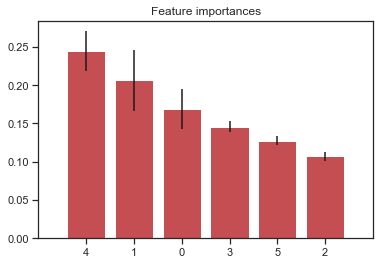

In [10]:
#varibale importance
importances = rfs.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfs.estimators_], axis= 0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print("Feature Ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d(%f)"% (f+1, indices[f],importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices) 
plt.xlim([-1, X.shape[1]]) 
plt.show()

In [11]:
#Undersampling training data with NearMiss due to imbalance data problem
nm = NearMiss(random_state=1)
X2_train,Y2_train=nm.fit_resample(X_train,Y_train)

#Random Forest Classifier with NearMiss
rfnm = RandomForestClassifier()
rfnm.fit(X2_train, Y2_train)
rfnm_prediction_training=rfnm.predict(X2_train)
rfnm_prediction_test = rfnm.predict(X_test)
print('Akurasi (training data) = ', accuracy_score(Y2_train, rfnm_prediction_training))
print('Akurasi (test data) = ', accuracy_score(Y_test, rfnm_prediction_test))
print(confusion_matrix(Y_test, rfnm_prediction_test))
print(classification_report(Y_test, rfnm_prediction_test))



Akurasi (training data) =  0.8915364583333333
Akurasi (test data) =  0.49242537873106346
[[2053 2949]
 [ 435 1230]]
              precision    recall  f1-score   support

           0       0.83      0.41      0.55      5002
           1       0.29      0.74      0.42      1665

   micro avg       0.49      0.49      0.49      6667
   macro avg       0.56      0.57      0.48      6667
weighted avg       0.69      0.49      0.52      6667



F:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
#Combination of oversampling and undersampling with SMOTEENN
smo = SMOTEENN(random_state=1)
X3_train,Y3_train=smo.fit_resample(X_train,Y_train)

#Random Forest Classifier with SMOTEEN
w = 10
rfsmo = RandomForestClassifier(class_weight={0: 1, 1: w})

rfsmo.fit(X3_train,Y3_train)
rfsmo_prediction_training=rfsmo.predict(X3_train)
rfsmo_prediction_test = rfsmo.predict(X_test)


print('Akurasi (training data) = ', accuracy_score(Y3_train, rfsmo_prediction_training))
print('Akurasi (test data) = ', accuracy_score(Y_test, rfsmo_prediction_test))
print(confusion_matrix(Y_test, rfsmo_prediction_test))
try:print(roc_auc_score(Y_test, rfsmo_prediction_test))
except:pass
print(classification_report(Y_test, rfsmo_prediction_test))


#print(classification_report(Y_test, rfsmo_prediction_test))

Akurasi (training data) =  0.9965235669819711
Akurasi (test data) =  0.7649617519124043
[[4085  917]
 [ 650 1015]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5002
           1       0.53      0.61      0.56      1665

   micro avg       0.76      0.76      0.76      6667
   macro avg       0.69      0.71      0.70      6667
weighted avg       0.78      0.76      0.77      6667



F:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
#varibale importance
importances = rfsmo.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfsmo.estimators_], axis= 0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print("Feature Ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d(%f)"% (f+1, indices[f],importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices) 
plt.xlim([-1, X.shape[1]]) 
plt.show()